# Explore here

In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')
dataset.head()


,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [2]:
dataset.drop_duplicates()
dataset.reset_index(drop=True)

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


make numerical the categorical column

In [21]:

dataset["is_spam"] = dataset["is_spam"].apply(lambda x: 1 if x == True else 0).astype(int)
dataset.head()

,url,is_spam
0,briefingday u list manage unsubscribe,1
1,hvper,1
2,briefingday vnif,1
3,briefingday n mcommentform,0
4,briefingday fan,1


 Segment the URLs into parts according to their punctuation marks, remove stopwords, lemmatize, and so on

In [16]:
import re
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

def clean_and_lemmatize_url(url):
    url = re.sub(r'^https?:\/\/', '', url)
    url = re.sub(r'www\.', '', url)
    url = re.sub(r'\.com', '', url)
    url = re.sub(r'[/.-]', ' ', url)
    url = re.sub(r'[^a-zA-Z ]', '', url).lower()
    
    words = url.split()
    words = [word for word in words if word not in stop_words]
    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_url = ' '.join(lemmatized_words)
    
    return clean_url

dataset['url']= dataset['url'].apply(clean_and_lemmatize_url)



[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
url = "http://www.example-domain.com/path/to/page"
cleaned_url = clean_and_lemmatize_url(url)
cleaned_url

'example domain path page'

check for changed rows of words 

In [19]:
dataset['url']

0                   briefingday u list manage unsubscribe
1                                                   hvper
2                                        briefingday vnif
3                              briefingday n mcommentform
4                                         briefingday fan
                              ...                        
2994    smartcitiesworld net news news deepfake techno...
2995                                        youtube watch
2996                 techcrunch optimistic view deepfakes
2997    technologyreview startup claim deepfakes prote...
2998                                  bbc news technology
Name: url, Length: 2999, dtype: object

visualise for word popularity

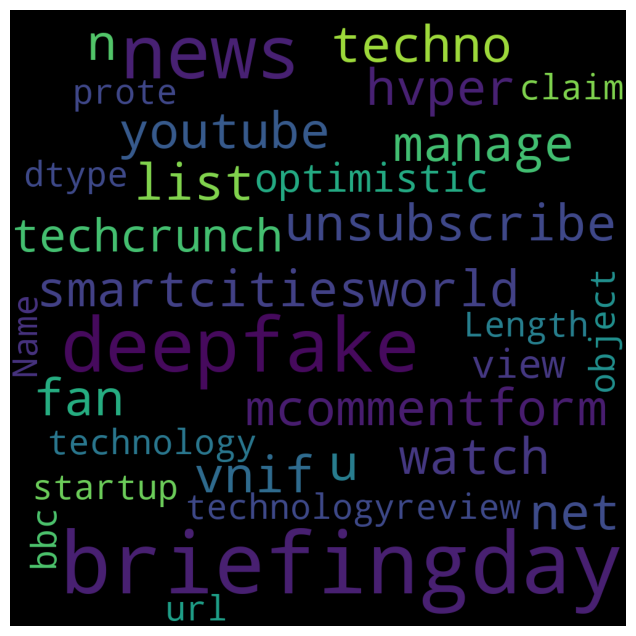

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 1000, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(dataset["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

vectorize all the data

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tokens_list = dataset.url

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = dataset["is_spam"]

create the svm model

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
from sklearn.svm import SVC
model = SVC(kernel ="linear", random_state=42)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [28]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9366666666666666

In [31]:
from pickle import dump
dump(model, open("svm_classifier_linear_42.sav", "wb"))

try again using a 'linear' kernal paramater

In [34]:
from sklearn.svm import SVC
model = SVC(kernel ="rbf", random_state=42)
model.fit(X_train,y_train)

SVC(random_state=42)

In [35]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9366666666666666

In [36]:
from pickle import dump
dump(model, open("svm_classifier_rbf_42.sav", "wb"))

Optimize model performance by using grid search

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = SVC(kernel="linear", random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy_score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'C': 1}
Best cross-validation accuracy_score: 0.94


In [38]:
from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test) 
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.93      0.96      0.95       455\n           1       0.87      0.77      0.82       145\n\n    accuracy                           0.92       600\n   macro avg       0.90      0.87      0.88       600\nweighted avg       0.92      0.92      0.91       600\n'

the gridsearch with Best parameters found:  {'C': 1} produced the best accuracy score of 0.94